In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Specify the file paths
train_path = "/content/drive/MyDrive/ML Lab 1/train.csv"
valid_path = "/content/drive/MyDrive/ML Lab 1/valid.csv"
test_path = "/content/drive/MyDrive/ML Lab 1/test.csv"

# Load the CSV files into Pandas DataFrames
train = pd.read_csv(train_path)
valid = pd.read_csv(valid_path)
test = pd.read_csv(test_path)

In [ ]:
train_ = train.copy()
valid_ = valid.copy()
test_ = test.copy()

# KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
def knn_classifier(x_train, y_train, x_val, y_val):

  knn.fit(np.array(x_train), y_train)

  y_pred = knn.predict(np.array(x_val))

  accuracy = accuracy_score(y_val, y_pred)
  print(f"Accuracy: {accuracy *100:.2f} %")
  return accuracy

# Label 1

In [ ]:
# Remove rows where label 1 is NaN in the 'train' DataFrame
train_cleaned = train_[~np.isnan(train_['label_1'])]

# Remove rows where label 1 is NaN in the 'valid' DataFrame
valid_cleaned = valid_[~np.isnan(valid_['label_1'])]

In [ ]:
train_label = train_cleaned[['label_1', 'label_2', 'label_3', 'label_4']]
valid_label = valid_cleaned[['label_1', 'label_2', 'label_3', 'label_4']]
# test_label = test_[['label_1', 'label_2', 'label_3', 'label_4']]

In [ ]:
train_features = train_cleaned.iloc[:, :-4]
valid_features = valid_cleaned.iloc[:, :-4]
test_features = test.iloc[:, :-4]

train_features.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,2.029255,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.970327,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606


In [ ]:
train_features_with_label = train_cleaned.iloc[:, :-3]
valid_features_with_label = valid_cleaned.iloc[:, :-3]

train_features_with_label.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45


<Axes: xlabel='label_1', ylabel='count'>

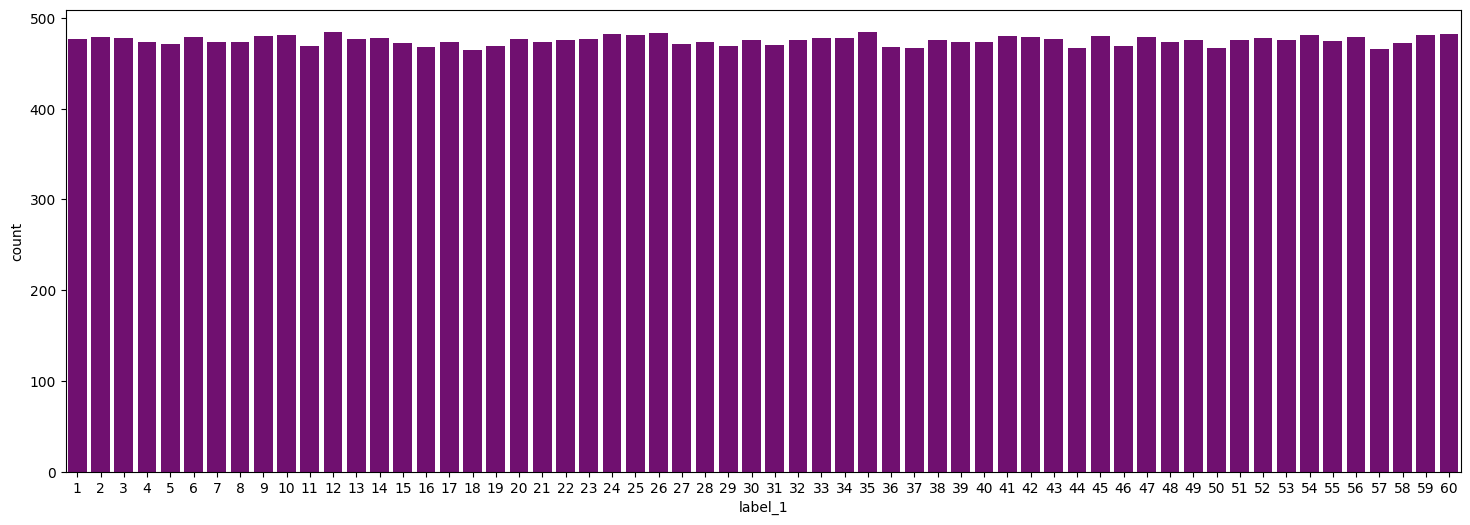

In [ ]:
plt.figure(figsize=(18, 6))
sn.countplot(data=train_label, x='label_1', color='purple')

In [ ]:
knn_classifier(train_features, train_label['label_1'], valid_features, valid_label['label_1'])

Accuracy: 98.93 %


0.9893333333333333

In [ ]:
test_features.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,1.670388,-0.355608,-0.342747,-0.102831,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,1.136570,0.826741,-0.371280,-1.492272,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,0.343188,-0.243809,0.462302,-1.511495,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,3.057573,-0.632902,1.511204,-0.658826,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,1.217447,-0.374313,1.280207,-1.546299,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939


In [ ]:
label1_pred_test_before_fe = knn.predict(np.array(test_features))

# Correlation

In [ ]:
train_corr_matrix = train_features.corr()

In [ ]:
def get_correlated_features(corr_matrix):
  threshold = 0.5
  correlated_features = set()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

  return correlated_features

In [ ]:
train_corr_features = get_correlated_features(train_corr_matrix)

# Remove the specified features from the 'train_cleaned' DataFrame
train_features_with_label_1 = train_features_with_label.drop(columns=list(train_corr_features))
# Remove the specified features from the 'valid_cleaned' DataFrame
valid_features_with_label_1 = valid_features_with_label.drop(columns=list(train_corr_features))
# Remove the specified features from the 'test_cleaned' DataFrame
test_features = test_features.drop(columns=list(train_corr_features))

train_features_with_label_1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_245,feature_247,feature_248,feature_249,feature_250,feature_251,feature_253,feature_254,feature_255,label_1
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,0.050984,2.029255,1.007398,-0.317517,-0.148447,-0.691538,0.441157,-1.494434,-0.344974,45
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,0.392081,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,0.151163,-1.876885,1.651534,45
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-1.254205,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,2.745906,-0.680754,-0.643588,45
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-1.900102,0.970327,-0.718073,-2.546477,-2.172275,0.709032,1.055266,-0.915258,-0.924856,45
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-1.124437,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,1.869753,-2.498570,3.268253,45


In [ ]:
print(len(train_corr_features))

63


In [ ]:
train_corr_matrix_with_label_1 = train_features_with_label_1.corr()

# train_corr_matrix_with_label.head()

In [ ]:
def get_correlated_features_by_label(corr_matrix, label_name):

    threshold = 0.01
    # Extract the column index of the specified label column
    label_col_index = corr_matrix.columns.get_loc(label_name)

    # Get the correlation values between features and the specified label
    correlations_with_label = corr_matrix.iloc[:, label_col_index]

    # Filter for features that are correlated with the label above the threshold
    correlated_features = correlations_with_label[correlations_with_label.index != label_name]
    correlated_features = correlated_features[correlated_features.abs() < threshold]

    return correlated_features.index.tolist()



In [ ]:
new_train_corr_features = get_correlated_features_by_label(train_corr_matrix_with_label_1, 'label_1')

# Remove the specified features
train_after_corr = train_features_with_label_1.drop(columns=new_train_corr_features)

# Remove the specified features
valid_after_corr = valid_features_with_label_1.drop(columns=new_train_corr_features)

# Remove the specified features
test_after_corr = test_features.drop(columns=new_train_corr_features)


In [ ]:
print(len(new_train_corr_features))

8


In [ ]:
train_fe = train_after_corr.drop(columns=['label_1'])
valid_fe = valid_after_corr.drop(columns=['label_1'])

In [ ]:
knn_classifier(train_fe, train_label['label_1'], valid_fe, valid_label['label_1'] )

Accuracy: 98.53 %


0.9853333333333333

## Standardization

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
train_after_corr.head()

,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_245,feature_247,feature_248,feature_249,feature_250,feature_251,feature_253,feature_254,feature_255,label_1
0,-1.928826,-0.291540,1.105909,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,-2.405058,...,0.050984,2.029255,1.007398,-0.317517,-0.148447,-0.691538,0.441157,-1.494434,-0.344974,45
1,-1.709277,-1.008998,0.956611,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,0.366822,...,0.392081,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,0.151163,-1.876885,1.651534,45
2,-1.906183,-0.357562,-0.682627,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,0.404180,...,-1.254205,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,2.745906,-0.680754,-0.643588,45
3,0.697872,-2.218567,-0.572214,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,-1.268182,...,-1.900102,0.970327,-0.718073,-2.546477,-2.172275,0.709032,1.055266,-0.915258,-0.924856,45
4,-1.976895,-0.496308,0.368102,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,0.020664,...,-1.124437,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,1.869753,-2.498570,3.268253,45


In [ ]:
valid_after_corr.head()

,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_245,feature_247,feature_248,feature_249,feature_250,feature_251,feature_253,feature_254,feature_255,label_1
0,-1.153148,-1.038098,1.419872,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,-1.409379,...,1.344741,3.051455,-1.061046,0.382224,0.076990,-0.719046,0.144460,-3.240056,0.052614,45
1,-1.377524,-1.018393,1.102352,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,-1.480036,...,0.319849,1.343224,0.120304,-0.066218,-0.231481,-1.383339,1.044895,-2.289637,0.199752,45
2,0.889574,-2.743300,-0.320194,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,-0.068064,...,-0.852068,3.139382,-1.166126,-1.299070,-2.486144,1.178322,0.857712,-1.928684,0.639870,45
3,-1.527213,-1.133121,0.385927,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,-0.565188,...,1.160198,0.029133,-1.663985,-0.865878,-1.387906,-0.664176,0.975368,-2.700269,1.523236,45
4,0.948176,-0.750248,0.008329,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,-0.160699,...,0.299558,-0.295354,0.061812,-0.368456,0.344975,-0.665200,-0.393100,-1.854657,2.207063,45


In [ ]:
test_after_corr.head()

,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_242,feature_245,feature_247,feature_248,feature_249,feature_250,feature_251,feature_253,feature_254,feature_255
0,-1.141206,-0.279703,1.019681,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,-1.319081,...,-1.429008,0.349351,1.670388,-0.355608,-0.342747,-0.102831,-0.868282,0.438561,-1.625122,0.599944
1,-1.796767,-0.056758,0.771219,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,-0.479915,...,0.183315,-1.338262,1.136570,0.826741,-0.371280,-1.492272,0.227806,2.200402,-1.701029,1.163999
2,-1.388968,-0.418296,0.186543,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,-1.042928,...,-1.112428,-1.146950,0.343188,-0.243809,0.462302,-1.511495,-0.692679,1.377531,-1.854203,-0.040538
3,1.276844,-0.112323,-0.310796,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,-1.792053,...,0.031966,-1.361689,3.057573,-0.632902,1.511204,-0.658826,-0.690499,0.930102,-2.758352,-0.246738
4,-1.560815,-0.168494,1.249770,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,-1.662481,...,-1.402533,-1.979684,1.217447,-0.374313,1.280207,-1.546299,-0.510597,2.497490,-1.597984,-0.163483


In [ ]:
# remove lable for PCA
train = train_after_corr.drop(columns=["label_1"])
valid = valid_after_corr.drop(columns=["label_1"])
test = test_after_corr

In [ ]:
scaler = RobustScaler()

# Fit and transform the training data
train_standardized = scaler.fit_transform(train)

# Transform the validation data using the same scaler
valid_standardized = scaler.transform(valid)

# Transform the test data using the same scaler
test_standardized = scaler.transform(test)

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
threshold = 0.95

pca = PCA(threshold, svd_solver='full')

pca_train = pca.fit_transform(train_standardized)
pca_valid = pca.transform(valid_standardized)
pca_test = pca.transform(test_standardized)

explained_variance = pca.explained_variance_ratio_

retained_features_len = len(explained_variance)
print("Number of componenets for train data:", retained_features_len)

Number of componenets for train data: 64


In [ ]:
min_components = 256
threshold = 0.95
while True:
    pca = PCA(n_components=threshold, svd_solver='full')

    min_components = pca_train.shape[1]
    pca_train = pca.fit_transform(pca_train)
    pca_valid = pca.transform(pca_valid)
    pca_test = pca.transform(pca_test)

    accuracy_val = knn_classifier(pca_train, train_label['label_1'], pca_valid, valid_label['label_1'])
    if accuracy_val < 0.975:
        break

print(min_components)

Accuracy: 97.87 %
Accuracy: 97.20 %
48


In [ ]:
pca = PCA(n_components=min_components, svd_solver = 'full')

pca_train = pca.fit_transform(train_standardized)
pca_valid = pca.transform(valid_standardized)
pca_test = pca.transform(test_standardized)

explained_variance = pca.explained_variance_ratio_

retained_features_len = len(explained_variance)
print("Number of componenets for train data:", retained_features_len)

Number of componenets for train data: 48


In [ ]:
knn_classifier(pca_train, train_label['label_1'], pca_valid, valid_label['label_1'])

Accuracy: 97.87 %


0.9786666666666667

In [ ]:
label1_pred_test_after_fe = knn.predict(np.array(pca_test))

In [ ]:
label_1_features = pd.DataFrame(data=pca_test, columns=[f'new_feature_{i+1}' for i in range(pca_test.shape[1])])
label_1_features.insert(0,'Predicted labels before feature engineering',label1_pred_test_before_fe)
label_1_features.insert(1,'Predicted labels after feature engineering', label1_pred_test_after_fe)
label_1_features.insert(2,'No of new features', pca_test.shape[1])

In [ ]:
label_1_features.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_39,new_feature_40,new_feature_41,new_feature_42,new_feature_43,new_feature_44,new_feature_45,new_feature_46,new_feature_47,new_feature_48
0,45,45,48,-1.237888,1.493710,4.578808,-1.301511,0.730076,2.926361,-0.572369,...,0.570847,0.970343,0.063752,-1.173582,1.065189,-0.625420,-0.093858,-0.984497,0.091137,0.297552
1,45,45,48,-2.595474,2.379584,4.792560,3.849074,5.572285,1.892779,-1.910506,...,-0.549787,0.166014,-0.030251,-0.361858,0.723366,-0.677524,-0.122993,0.327750,0.607721,0.287223
2,45,45,48,-1.640527,0.779419,2.269737,2.090977,2.330855,3.515256,-0.752128,...,-0.645702,0.580809,0.809837,-0.350878,0.005965,0.151689,-0.293334,0.069339,-0.276012,1.104070
3,45,45,48,0.444395,1.474965,3.608533,1.316997,1.211976,-2.531716,2.465677,...,-0.405151,0.596794,0.772797,-1.555018,-0.641219,-0.277662,0.769854,0.435560,1.064595,-0.513991
4,45,45,48,1.143664,2.511204,1.844491,0.667453,0.948453,2.005462,-0.076882,...,0.951703,1.101481,-0.040559,-0.313028,-1.116218,-0.250246,-0.146579,0.162680,-0.598409,-0.323189


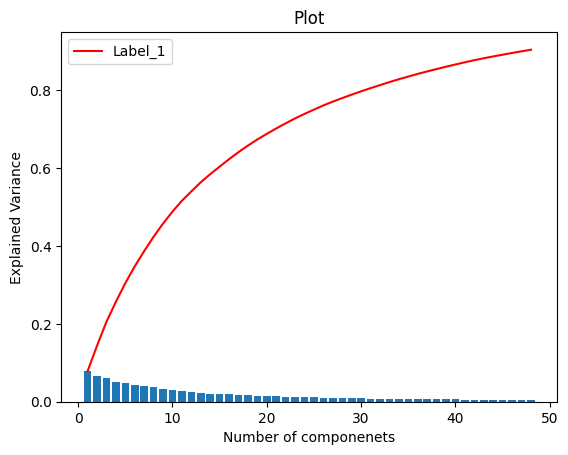

In [ ]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)

plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance),
         c='red', label='Label_1')

plt.legend(loc='upper left')
plt.xlabel('Number of componenets')
plt.ylabel('Explained Variance')
plt.title('Plot')

plt.show()

## Label 2


In [ ]:
# Remove rows where label 1 is NaN in the 'train' DataFrame
train_cleaned_label_2 = train_[~np.isnan(train_['label_2'])]

# Remove rows where label 1 is NaN in the 'valid' DataFrame
valid_cleaned_label_2 = valid_[~np.isnan(valid_['label_2'])]

In [ ]:
train_label_2 = train_cleaned_label_2[['label_1', 'label_2', 'label_3', 'label_4']]
valid_label_2 = valid_cleaned_label_2[['label_1', 'label_2', 'label_3', 'label_4']]
# test_label_2 = test_[['label_1', 'label_2', 'label_3', 'label_4']]

train_label_2['label_2'].head()

480    25.0
481    25.0
482    25.0
483    25.0
484    25.0
Name: label_2, dtype: float64

In [ ]:
train_features_label_2 = train_cleaned_label_2.iloc[:, :-4]
valid_features_label_2 = valid_cleaned_label_2.iloc[:, :-4]
test_features_label_2 = test_.iloc[:, :-4]

train_features_label_2.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
480,-2.133907,-1.851185,-0.401913,0.579630,0.701037,-0.212690,-0.708243,3.016801,0.464313,-0.825300,...,0.332230,-1.325403,0.563739,-0.180270,-0.598476,2.794869,1.049926,-2.829166,0.908335,-1.295668
481,-0.404385,-0.836757,0.762689,1.637213,0.665621,0.625971,0.262635,1.408128,0.776417,-2.443906,...,-1.451546,-0.435936,-0.216273,-1.313571,1.234601,0.764250,1.848260,-1.138066,-0.143287,-1.997515
482,-1.642496,-1.278682,0.164281,1.371167,0.258172,-0.896479,-0.051402,0.623235,0.367427,-1.211149,...,0.652031,-0.044023,1.547585,-0.239684,0.269733,1.143640,1.827864,-2.056184,-0.070624,-2.222077
483,-0.191927,-2.451684,0.547922,-0.041680,0.804643,-0.324783,0.806728,1.507769,-0.657439,-0.784736,...,-0.799259,-0.702702,0.617131,-0.730333,1.085195,-1.203888,2.832388,-1.943990,0.208316,-2.421425
484,-0.510969,-0.781623,-1.478504,0.794873,0.354653,0.268014,-1.677308,1.627065,0.985870,-2.165971,...,-0.607510,-1.884749,1.849695,0.071822,-0.820887,1.300054,2.499395,-1.692642,0.563708,-0.975423


In [ ]:
train_features_with_label_2 = train_cleaned_label_2.iloc[:, :-2].drop(columns=['label_1'])
valid_features_with_label_2 = valid_cleaned_label_2.iloc[:, :-2].drop(columns=['label_1'])

train_features_with_label_2.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_2
480,-2.133907,-1.851185,-0.401913,0.579630,0.701037,-0.212690,-0.708243,3.016801,0.464313,-0.825300,...,-1.325403,0.563739,-0.180270,-0.598476,2.794869,1.049926,-2.829166,0.908335,-1.295668,25.0
481,-0.404385,-0.836757,0.762689,1.637213,0.665621,0.625971,0.262635,1.408128,0.776417,-2.443906,...,-0.435936,-0.216273,-1.313571,1.234601,0.764250,1.848260,-1.138066,-0.143287,-1.997515,25.0
482,-1.642496,-1.278682,0.164281,1.371167,0.258172,-0.896479,-0.051402,0.623235,0.367427,-1.211149,...,-0.044023,1.547585,-0.239684,0.269733,1.143640,1.827864,-2.056184,-0.070624,-2.222077,25.0
483,-0.191927,-2.451684,0.547922,-0.041680,0.804643,-0.324783,0.806728,1.507769,-0.657439,-0.784736,...,-0.702702,0.617131,-0.730333,1.085195,-1.203888,2.832388,-1.943990,0.208316,-2.421425,25.0
484,-0.510969,-0.781623,-1.478504,0.794873,0.354653,0.268014,-1.677308,1.627065,0.985870,-2.165971,...,-1.884749,1.849695,0.071822,-0.820887,1.300054,2.499395,-1.692642,0.563708,-0.975423,25.0


<Axes: xlabel='label_2', ylabel='Count'>

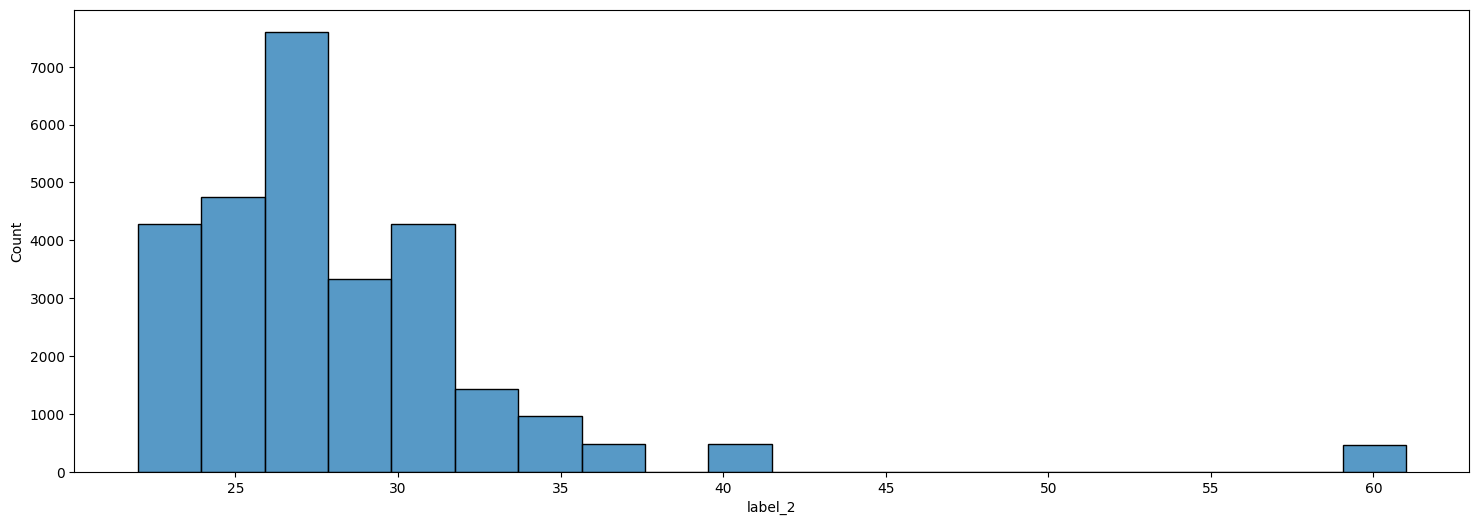

In [ ]:
plt.figure(figsize=(18, 6))
sn.histplot(data=train_label_2, x='label_2', bins=20, kde=False)

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor()

model.fit(train_features_label_2, train_label_2['label_2'])
y_pred = model.predict(valid_features_label_2)

score = math.sqrt(mean_squared_error(valid_label_2['label_2'], y_pred))

print('Test Score: %.2f RMSE' % (score))

Test Score: 3.29 RMSE


In [ ]:
label2_pred_test_before_fe = model.predict(test_features_label_2)

In [ ]:
train_corr_matrix_2 = train_features_label_2.corr()

In [ ]:
train_corr_features_2 = get_correlated_features(train_corr_matrix_2)


train_features_with_label_2 = train_features_with_label_2.drop(columns=list(train_corr_features_2))
valid_features_with_label_2 = valid_features_with_label_2.drop(columns=list(train_corr_features_2))
test_features_label_2 = test_features_label_2.drop(columns=list(train_corr_features_2))

train_features_with_label_2.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_242,feature_245,feature_247,feature_248,feature_249,feature_250,feature_253,feature_254,feature_255,label_2
480,-2.133907,-1.851185,-0.401913,0.579630,0.701037,-0.212690,-0.708243,3.016801,0.464313,-0.825300,...,1.695920,-0.410617,0.332230,-1.325403,0.563739,-0.180270,1.049926,-2.829166,0.908335,25.0
481,-0.404385,-0.836757,0.762689,1.637213,0.665621,0.625971,0.262635,1.408128,0.776417,-2.443906,...,-0.463064,0.129273,-1.451546,-0.435936,-0.216273,-1.313571,1.848260,-1.138066,-0.143287,25.0
482,-1.642496,-1.278682,0.164281,1.371167,0.258172,-0.896479,-0.051402,0.623235,0.367427,-1.211149,...,0.216921,0.976567,0.652031,-0.044023,1.547585,-0.239684,1.827864,-2.056184,-0.070624,25.0
483,-0.191927,-2.451684,0.547922,-0.041680,0.804643,-0.324783,0.806728,1.507769,-0.657439,-0.784736,...,1.293167,0.587702,-0.799259,-0.702702,0.617131,-0.730333,2.832388,-1.943990,0.208316,25.0
484,-0.510969,-0.781623,-1.478504,0.794873,0.354653,0.268014,-1.677308,1.627065,0.985870,-2.165971,...,0.177583,0.335045,-0.607510,-1.884749,1.849695,0.071822,2.499395,-1.692642,0.563708,25.0


In [ ]:
print(len(train_corr_features_2))

61


In [ ]:
train_corr_matrix_with_label_2 = train_features_with_label_2.corr()

In [ ]:
new_train_corr_features_2 = get_correlated_features_by_label(train_corr_matrix_with_label_2, 'label_2')

# Remove the specified features
train_after_corr_2 = train_features_with_label_2.drop(columns=new_train_corr_features_2)

# Remove the specified features
valid_after_corr_2 = valid_features_with_label_2.drop(columns=new_train_corr_features_2)

# Remove the specified features
test_after_corr_2 = test_features_label_2.drop(columns=new_train_corr_features_2)

In [ ]:
print(len(new_train_corr_features_2))

20


In [ ]:
# remove lable for PCA
train_2 = train_after_corr_2.drop(columns=["label_2"])
valid_2 = valid_after_corr_2.drop(columns=["label_2"])
test_2 = test_after_corr_2

In [ ]:
train_2.head()

,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_236,feature_241,feature_242,feature_245,feature_248,feature_249,feature_250,feature_253,feature_254,feature_255
480,-2.133907,-1.851185,-0.401913,0.701037,-0.212690,-0.708243,3.016801,0.464313,-0.825300,-1.220320,...,-1.506275,2.140065,1.695920,-0.410617,-1.325403,0.563739,-0.180270,1.049926,-2.829166,0.908335
481,-0.404385,-0.836757,0.762689,0.665621,0.625971,0.262635,1.408128,0.776417,-2.443906,-0.633325,...,-1.209222,1.585858,-0.463064,0.129273,-0.435936,-0.216273,-1.313571,1.848260,-1.138066,-0.143287
482,-1.642496,-1.278682,0.164281,0.258172,-0.896479,-0.051402,0.623235,0.367427,-1.211149,-2.614451,...,-0.816211,1.535156,0.216921,0.976567,-0.044023,1.547585,-0.239684,1.827864,-2.056184,-0.070624
483,-0.191927,-2.451684,0.547922,0.804643,-0.324783,0.806728,1.507769,-0.657439,-0.784736,-1.196645,...,-1.413194,1.207664,1.293167,0.587702,-0.702702,0.617131,-0.730333,2.832388,-1.943990,0.208316
484,-0.510969,-0.781623,-1.478504,0.354653,0.268014,-1.677308,1.627065,0.985870,-2.165971,-1.231401,...,-0.438560,2.890184,0.177583,0.335045,-1.884749,1.849695,0.071822,2.499395,-1.692642,0.563708


In [ ]:
scaler = RobustScaler()

train_standardized_2 = scaler.fit_transform(train_2)
valid_standardized_2 = scaler.transform(valid_2)
test_standardized_2 = scaler.transform(test_2)

In [ ]:
pca = PCA(threshold, svd_solver='full')

pca_train_2 = pca.fit_transform(train_standardized_2)
pca_valid_2 = pca.transform(valid_standardized_2)
pca_test_2 = pca.transform(test_standardized_2)

explained_variance = pca.explained_variance_ratio_

retained_features_len = len(explained_variance)
print("Number of componenets for train data:", retained_features_len)

Number of componenets for train data: 62


In [ ]:
min_components = 256
threshold = 0.95
while True:
    pca = PCA(n_components=threshold, svd_solver='full')

    min_components = pca_train_2.shape[1]
    pca_train_2 = pca.fit_transform(pca_train_2)
    pca_valid_2 = pca.transform(pca_valid_2)
    pca_test_2 = pca.transform(pca_test_2)

    model = xgb.XGBRegressor()
    model.fit(pca_train_2, train_label_2['label_2'])
    y_pred = model.predict(pca_valid_2)

    score_val = math.sqrt(mean_squared_error(valid_label_2['label_2'], y_pred))
    if score_val > 3.8:
        break

print(min_components)

39


In [ ]:
pca = PCA(n_components=min_components, svd_solver = 'full')

pca_train_2 = pca.fit_transform(train_standardized_2)
pca_valid_2 = pca.transform(valid_standardized_2)
pca_test_2 = pca.transform(test_standardized_2)

explained_variance = pca.explained_variance_ratio_

retained_features_len = len(explained_variance)
print("Number of componenets for train data:", retained_features_len)

Number of componenets for train data: 39


In [ ]:
model = xgb.XGBRegressor()
model.fit(pca_train_2, train_label_2['label_2'])
y_pred = model.predict(pca_valid_2)

score_val = math.sqrt(mean_squared_error(valid_label_2['label_2'], y_pred))
print('Test Score: %.2f RMSE' % (score_val))

Test Score: 3.68 RMSE


In [ ]:
label2_pred_test_after_fe = model.predict(pca_test_2)

In [ ]:
label_2_features = pd.DataFrame(data=pca_test_2, columns=[f'new_feature_{i+1}' for i in range(pca_test_2.shape[1])])
label_2_features.insert(0,'Predicted labels before feature engineering',label2_pred_test_before_fe)
label_2_features.insert(1,'Predicted labels after feature engineering', label2_pred_test_after_fe)
label_2_features.insert(2,'No of new features', pca_test_2.shape[1])

In [ ]:
label_2_features.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_30,new_feature_31,new_feature_32,new_feature_33,new_feature_34,new_feature_35,new_feature_36,new_feature_37,new_feature_38,new_feature_39
0,28.361826,26.071320,39,-2.424077,-4.402085,0.451943,0.506281,-0.304175,-2.984711,-0.388707,...,1.886487,2.130749,0.556226,-0.341602,0.720176,-1.126720,-1.444960,-0.466738,-0.192943,-0.567040
1,31.941986,30.614929,39,-3.368371,-3.590544,1.275644,1.117289,-6.663675,-0.591064,-1.736046,...,-0.489644,0.571359,0.380327,-0.676903,0.018987,-0.749006,-0.177468,-1.223962,-0.296646,0.307175
2,27.971960,27.612190,39,-1.817146,-1.788876,0.467053,1.405405,-2.858417,-2.473579,-1.141048,...,-0.613220,1.237471,-0.369015,-0.555012,0.577890,-0.065378,-0.808737,0.336060,-0.564583,0.500169
3,26.545124,28.380016,39,-0.844817,-3.523627,0.348441,-0.255848,-2.372271,3.407948,1.871370,...,-1.911700,1.643508,-1.275594,-0.723806,2.007869,-0.174505,-0.168349,0.550439,-1.007105,0.955615
4,28.345411,26.972601,39,-0.343803,-1.469707,2.900645,0.084850,-1.055705,-0.900407,0.079152,...,0.747079,0.953668,-1.836797,-0.170611,-0.126860,-0.594186,-1.050944,0.571819,0.583211,-1.195915


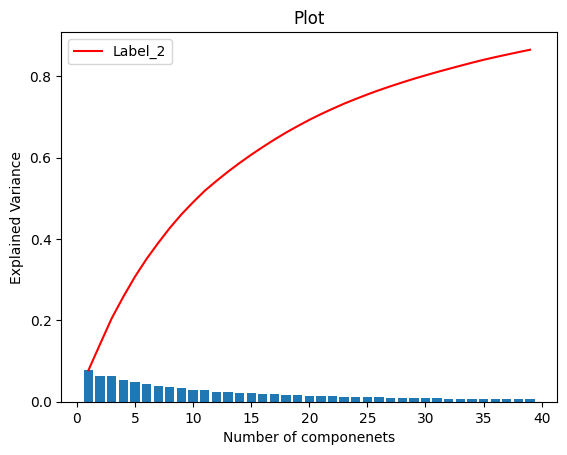

In [ ]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)

plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance),
         c='red', label='Label_2')

plt.legend(loc='upper left')
plt.xlabel('Number of componenets')
plt.ylabel('Explained Variance')
plt.title('Plot')

plt.show()

# Label 3

In [ ]:
# Remove rows where label 3 is NaN in the 'train' DataFrame
train_cleaned_label_3 = train_[~np.isnan(train_['label_3'])]

# Remove rows where label 3 is NaN in the 'valid' DataFrame
valid_cleaned_label_3 = valid_[~np.isnan(valid_['label_3'])]

In [ ]:
train_label_3 = train_cleaned_label_3[['label_1', 'label_2', 'label_3', 'label_4']]
valid_label_3 = valid_cleaned_label_3[['label_1', 'label_2', 'label_3', 'label_4']]
# test_label_2 = test_[['label_1', 'label_2', 'label_3', 'label_4']]

train_label_3['label_3'].head()

0    1
1    1
2    1
3    1
4    1
Name: label_3, dtype: int64

In [ ]:
train_features_label_3 = train_cleaned_label_3.iloc[:, :-4]
valid_features_label_3 = valid_cleaned_label_3.iloc[:, :-4]
test_features_label_3= test_.iloc[:, :-4]

train_features_label_3.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,2.029255,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.970327,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606


In [ ]:
train_features_with_label_3 = train_cleaned_label_3.iloc[:, :-1].drop(columns=['label_1', 'label_2'])
valid_features_with_label_3 = valid_cleaned_label_3.iloc[:, :-1].drop(columns=['label_1', 'label_2'])

train_features_with_label_3.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_3
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,1
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,1
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,1
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,1
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,1


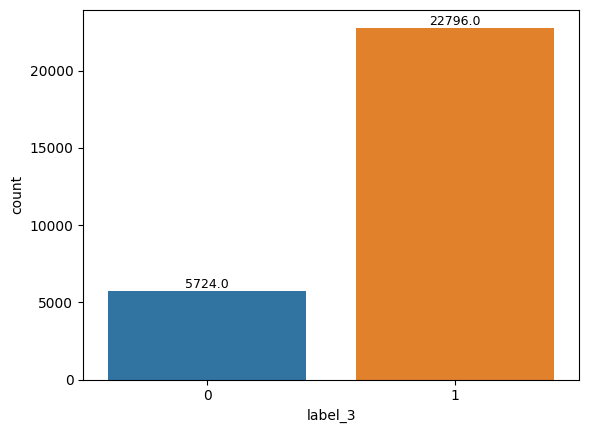

In [ ]:
x = sn.countplot(x=train_label_3['label_3'])

for p in x.patches:
    x.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
sampler = RandomOverSampler(random_state=0, sampling_strategy=0.80)
train_features_resampled, train_label_resampled = sampler.fit_resample(train_features_label_3, train_label_3['label_3'])

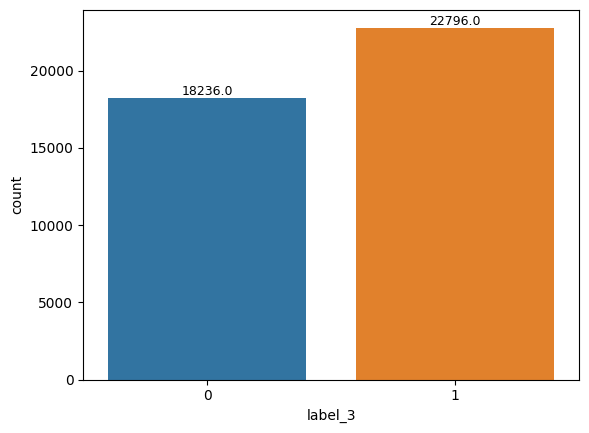

In [ ]:
x = sn.countplot(x=train_label_resampled)

for p in x.patches:
    x.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

In [ ]:
knn_classifier(train_features_resampled, train_label_resampled, valid_features_label_3, valid_label_3['label_3'])

Accuracy: 100.00 %


1.0

In [ ]:
label3_pred_test_before_fe = knn.predict(np.array(test_features_label_3))

In [ ]:
train_corr_matrix_3 = train_features_resampled.corr()
train_features_resampled.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,2.029255,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.970327,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606


In [ ]:
train_features_with_label_3 = pd.concat([train_features_resampled, train_label_resampled], axis=1)
train_features_with_label_3.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_3
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,1
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,1
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,1
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,1
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,1


In [ ]:
train_corr_features_3= get_correlated_features(train_corr_matrix_3)

train_features_with_label_3 = train_features_with_label_3.drop(columns=list(train_corr_features_3))
valid_features_with_label_3 = valid_features_with_label_3.drop(columns=list(train_corr_features_3))
test_features_label_3 = test_features_label_3.drop(columns=list(train_corr_features_3))

train_features_with_label_3.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_253,feature_254,feature_255,label_3
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,0.484349,2.029255,1.007398,-0.317517,-0.148447,-0.691538,0.441157,-1.494434,-0.344974,1
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.538095,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,0.151163,-1.876885,1.651534,1
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.449335,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,2.745906,-0.680754,-0.643588,1
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-0.430455,0.970327,-0.718073,-2.546477,-2.172275,0.709032,1.055266,-0.915258,-0.924856,1
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,0.334654,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,1.869753,-2.498570,3.268253,1


In [ ]:
print(len(train_corr_features_3))

60


In [ ]:
train_corr_matrix_with_label_3 = train_features_with_label_3.corr()

In [ ]:
new_train_corr_features_3 = get_correlated_features_by_label(train_corr_matrix_with_label_3, 'label_3')

train_after_corr_3 = train_features_with_label_3.drop(columns=new_train_corr_features_3)
valid_after_corr_3 = valid_features_with_label_3.drop(columns=new_train_corr_features_3)
test_after_corr_3 = test_features_label_3.drop(columns=new_train_corr_features_3)

In [ ]:
print(len(new_train_corr_features_3))

3


In [ ]:
train_3 = train_after_corr_3.drop(columns=["label_3"])
valid_3 = valid_after_corr_3.drop(columns=["label_3"])
test_3 = test_after_corr_3

In [ ]:
train_label_3 = train_features_with_label_3

In [ ]:
knn_classifier(train_3, train_label_3['label_3'], valid_3, valid_label_3['label_3'])

Accuracy: 100.00 %


1.0

In [ ]:
scaler = RobustScaler()

train_standardized_3 = scaler.fit_transform(train_3)
valid_standardized_3 = scaler.transform(valid_3)
test_standardized_3 = scaler.transform(test_3)

In [ ]:
pca = PCA(threshold, svd_solver='full')

pca_train_3 = pca.fit_transform(train_standardized_3)
pca_valid_3 = pca.transform(valid_standardized_3)
pca_test_3 = pca.transform(test_standardized_3)

explained_variance = pca.explained_variance_ratio_

retained_features_len = len(explained_variance)
print("Number of componenets for train data:", retained_features_len)

Number of componenets for train data: 64


In [ ]:
min_components = [256]
threshold = 0.95
accuracy_val = 1

while True:

    pca = PCA(n_components=threshold, svd_solver='full')


    pca_train_3 = pca.fit_transform(pca_train_3)
    pca_valid_3 = pca.transform(pca_valid_3)
    pca_test_3 = pca.transform(pca_test_3)

    accuracy_val = knn_classifier(pca_train_3, train_after_corr_3['label_3'], pca_valid_3, valid_label_3['label_3'])
    if accuracy_val < 1:
      break
    min_components.append(pca_train_3.shape[1])


print(min_components[-3])

Accuracy: 100.00 %
Accuracy: 100.00 %
Accuracy: 100.00 %
Accuracy: 100.00 %
Accuracy: 100.00 %
Accuracy: 99.87 %
33


In [ ]:
pca = PCA(n_components=min_components[-3], svd_solver = 'full')

pca_train_3 = pca.fit_transform(train_standardized_3)
pca_valid_3 = pca.transform(valid_standardized_3)
pca_test_3 = pca.transform(test_standardized_3)

explained_variance = pca.explained_variance_ratio_

retained_features_len = len(explained_variance)
print("Number of componenets for train data:", retained_features_len)

Number of componenets for train data: 33


In [ ]:
knn_classifier(pca_train_3, train_after_corr_3['label_3'], pca_valid_3, valid_label_3['label_3'])

Accuracy: 100.00 %


1.0

In [ ]:
label3_pred_test_after_fe = knn.predict(np.array(pca_test_3))

In [ ]:
label_3_features = pd.DataFrame(data=pca_test_3, columns=[f'new_feature_{i+1}' for i in range(pca_test_3.shape[1])])
label_3_features.insert(0,'Predicted labels before feature engineering',label3_pred_test_before_fe)
label_3_features.insert(1,'Predicted labels after feature engineering', label3_pred_test_after_fe)
label_3_features.insert(2,'No of new features', pca_test_3.shape[1])

In [ ]:
label_3_features.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_24,new_feature_25,new_feature_26,new_feature_27,new_feature_28,new_feature_29,new_feature_30,new_feature_31,new_feature_32,new_feature_33
0,1,1,33,-1.787229,5.193879,1.465769,-0.629352,1.417811,-1.959049,-4.850865,...,0.557325,-2.555358,-1.244654,0.988940,-0.157538,0.967015,-2.036442,-0.752314,-0.804355,2.111296
1,1,1,33,-4.080433,5.341550,-1.070907,-0.962034,7.418339,1.593988,-1.546130,...,2.060017,-1.627806,-1.062574,-1.236964,0.457972,0.926203,-0.333368,0.742588,1.473971,0.497400
2,1,1,33,-2.485243,2.481106,-0.788604,-1.288234,3.438235,0.306344,-0.522146,...,1.083979,-2.334664,-1.442670,-2.595833,1.513531,-0.204778,-0.130861,0.336266,0.674365,0.686189
3,1,1,33,-1.040382,4.577205,0.256157,1.179738,1.054809,2.908086,1.609126,...,-1.311564,-2.755352,-0.562265,-2.233612,-0.461189,-0.892796,-0.295723,-0.213418,0.122760,-0.966237
4,1,1,33,-0.281768,3.574806,-1.856914,-0.402424,1.872629,-0.294449,-2.781949,...,-0.098140,0.404220,0.594816,-0.864773,2.120175,-0.273027,-1.275434,0.074533,0.692617,-0.100726


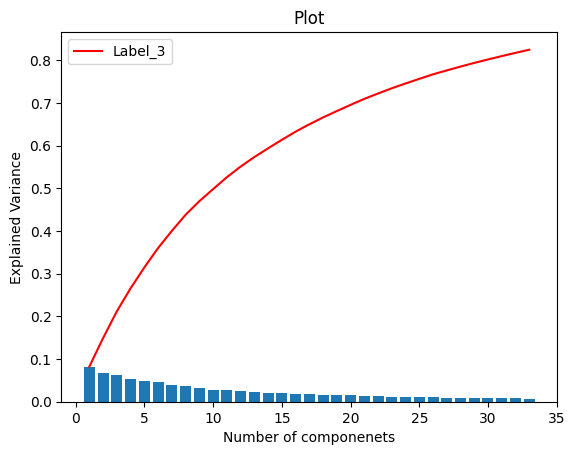

In [ ]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)

plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance),
         c='red', label='Label_3')

plt.legend(loc='upper left')
plt.xlabel('Number of componenets')
plt.ylabel('Explained Variance')
plt.title('Plot')

plt.show()

# Label 4

In [ ]:
train_cleaned_label_4 = train_[~np.isnan(train_['label_4'])]
valid_cleaned_label_4 = valid_[~np.isnan(valid_['label_4'])]

In [ ]:
train_label_4 = train_cleaned_label_4[['label_1', 'label_2', 'label_3', 'label_4']]
valid_label_4 = valid_cleaned_label_4[['label_1', 'label_2', 'label_3', 'label_4']]
# test_label_2 = test_[['label_1', 'label_2', 'label_3', 'label_4']]

train_label_4['label_4'].head()

0    6
1    6
2    6
3    6
4    6
Name: label_4, dtype: int64

In [ ]:
train_features_label_4 = train_cleaned_label_4.iloc[:, :-4]
valid_features_label_4 = valid_cleaned_label_4.iloc[:, :-4]
test_features_label_4= test_.iloc[:, :-4]

train_features_label_4.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,2.029255,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.970327,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606


In [ ]:
train_features_with_label_4 = train_cleaned_label_4.iloc[:, :].drop(columns=['label_1', 'label_2', 'label_3'])
valid_features_with_label_4 = valid_cleaned_label_4.iloc[:, :].drop(columns=['label_1', 'label_2', 'label_3'])

train_features_with_label_4.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,6


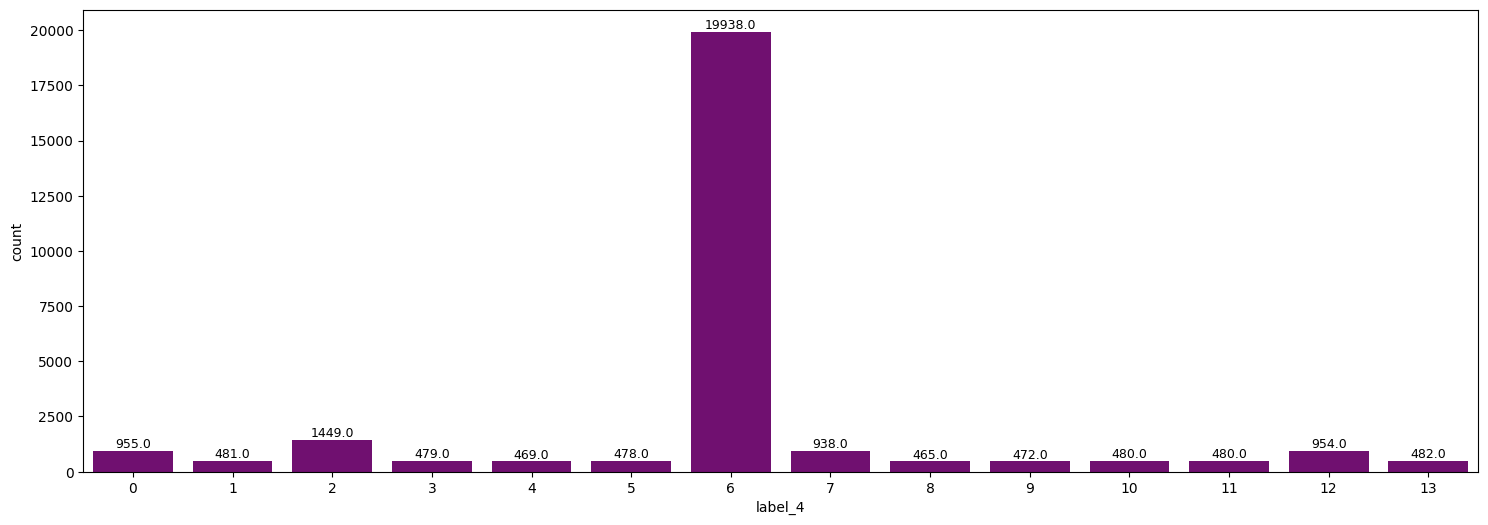

In [ ]:
plt.figure(figsize=(18, 6))
x = sn.countplot(x=train_label_4['label_4'], color='purple')

for p in x.patches:
    x.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

In [ ]:
sampler = RandomOverSampler(random_state=0)
train_features_resampled, train_label_resampled = sampler.fit_resample(train_features_label_4, train_label_4['label_4'])

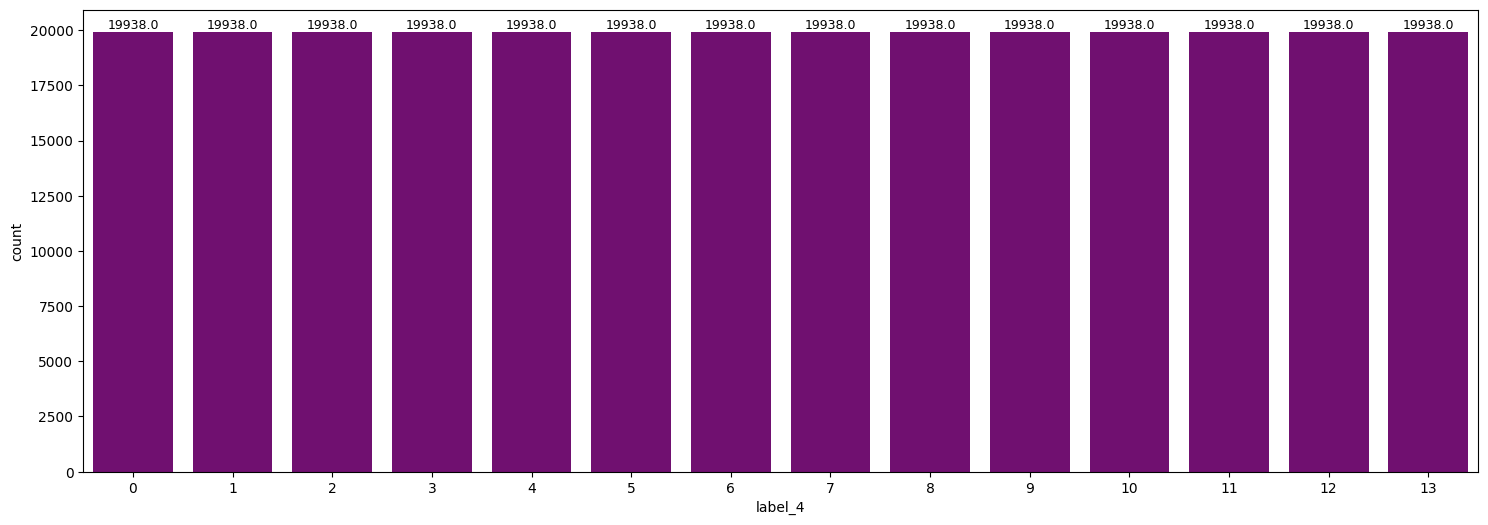

In [ ]:
plt.figure(figsize=(18, 6))
x= sn.countplot(x=train_label_resampled, color='purple')

for p in x.patches:
    x.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

In [ ]:
knn_classifier(train_features_resampled, train_label_resampled, valid_features_label_4, valid_label_4['label_4'])

Accuracy: 99.60 %


0.996

In [ ]:
label4_pred_test_before_fe = knn.predict(np.array(test_features_label_4))

In [ ]:
train_corr_matrix_4 = train_features_resampled.corr()
train_features_resampled.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,2.029255,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.970327,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606


In [ ]:
train_features_with_label_4 = pd.concat([train_features_resampled, train_label_resampled], axis=1)
train_features_with_label_4.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,6


In [ ]:
train_corr_features_4= get_correlated_features(train_corr_matrix_4)

train_features_with_label_4 = train_features_with_label_4.drop(columns=list(train_corr_features_4))
valid_features_with_label_4 = valid_features_with_label_4.drop(columns=list(train_corr_features_4))
test_features_label_4 = test_features_label_4.drop(columns=list(train_corr_features_4))

train_features_with_label_4.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_241,feature_242,feature_247,feature_248,feature_249,feature_251,feature_253,feature_254,feature_255,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,0.493664,-1.120888,2.029255,1.007398,-0.317517,-0.691538,0.441157,-1.494434,-0.344974,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,0.539124,-0.729385,1.260712,-1.559120,-1.369495,-0.668235,0.151163,-1.876885,1.651534,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,1.563842,0.900272,0.223475,-0.136551,-2.210191,-0.026728,2.745906,-0.680754,-0.643588,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,2.442918,0.544198,0.970327,-0.718073,-2.546477,0.709032,1.055266,-0.915258,-0.924856,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,0.402104,-0.035443,1.291582,-0.739541,-1.097638,-0.599700,1.869753,-2.498570,3.268253,6


In [ ]:
print(len(train_corr_features_3))

60


In [ ]:
train_corr_matrix_with_label_4 = train_features_with_label_4.corr()

In [ ]:
new_train_corr_features_4 = get_correlated_features_by_label(train_corr_matrix_with_label_4, 'label_4')

train_after_corr_4 = train_features_with_label_4.drop(columns=new_train_corr_features_4)
valid_after_corr_4 = valid_features_with_label_4.drop(columns=new_train_corr_features_4)
test_after_corr_4 = test_features_label_4.drop(columns=new_train_corr_features_4)

In [ ]:
print(len(new_train_corr_features_4))

8


In [ ]:
train_4 = train_after_corr_4.drop(columns=["label_4"])
valid_4 = valid_after_corr_4.drop(columns=["label_4"])
test_4 = test_after_corr_4

In [ ]:
train_label_4 = train_features_with_label_4

In [ ]:
knn_classifier(train_4, train_label_4['label_4'], valid_4, valid_label_4['label_4'])

Accuracy: 99.47 %


0.9946666666666667

In [ ]:
scaler = RobustScaler()

train_standardized_4 = scaler.fit_transform(train_4)
valid_standardized_4 = scaler.transform(valid_4)
test_standardized_4 = scaler.transform(test_4)

In [ ]:
pca = PCA(threshold, svd_solver='full')

pca_train_4 = pca.fit_transform(train_standardized_4)
pca_valid_4 = pca.transform(valid_standardized_4)
pca_test_4 = pca.transform(test_standardized_4)

explained_variance = pca.explained_variance_ratio_

retained_features_len = len(explained_variance)
print("Number of componenets for train data:", retained_features_len)

Number of componenets for train data: 62


In [ ]:
min_components = 256
threshold = 0.95
while True:
    pca = PCA(n_components=threshold, svd_solver='full')

    min_components = pca_train_4.shape[1]
    pca_train_4 = pca.fit_transform(pca_train_4)
    pca_valid_4 = pca.transform(pca_valid_4)
    pca_test_4 = pca.transform(pca_test_4)

    accuracy_val = knn_classifier(pca_train_4, train_after_corr_4['label_4'], pca_valid_4, valid_label_4['label_4'])
    if accuracy_val < 0.985:
        break

print(min_components)

Accuracy: 99.33 %
Accuracy: 98.93 %
Accuracy: 98.40 %
38


In [ ]:
pca = PCA(n_components=min_components, svd_solver = 'full')

pca_train_4 = pca.fit_transform(train_standardized_4)
pca_valid_4 = pca.transform(valid_standardized_4)
pca_test_4 = pca.transform(test_standardized_4)

explained_variance = pca.explained_variance_ratio_

retained_features_len = len(explained_variance)
print("Number of componenets for train data:", retained_features_len)

Number of componenets for train data: 38


In [ ]:
knn_classifier(pca_train_4, train_after_corr_4['label_4'], pca_valid_4, valid_label_4['label_4'])

Accuracy: 98.93 %


0.9893333333333333

In [ ]:
label4_pred_test_after_fe = knn.predict(np.array(pca_test_4))

In [ ]:
label_4_features = pd.DataFrame(data=pca_test_4, columns=[f'new_feature_{i+1}' for i in range(pca_test_4.shape[1])])
label_4_features.insert(0,'Predicted labels before feature engineering',label4_pred_test_before_fe)
label_4_features.insert(1,'Predicted labels after feature engineering', label4_pred_test_after_fe)
label_4_features.insert(2,'No of new features', pca_test_4.shape[1])

In [ ]:
label_4_features.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_29,new_feature_30,new_feature_31,new_feature_32,new_feature_33,new_feature_34,new_feature_35,new_feature_36,new_feature_37,new_feature_38
0,6,6,38,3.376300,3.058895,-0.099840,-1.998841,-1.500319,1.092864,1.743378,...,1.628491,0.188151,-0.651646,0.825616,2.415369,0.947081,0.064749,0.821842,0.316332,-0.793819
1,6,6,38,4.706348,2.169044,-2.066520,2.058211,-1.350165,-1.593338,0.049763,...,0.132457,-0.887101,-1.197036,0.840881,0.251037,1.705512,-1.121670,0.815215,-0.065322,1.497403
2,6,6,38,2.503442,0.320218,-0.489659,-0.035675,0.256081,0.603163,2.647671,...,0.304736,0.790217,-0.889747,-0.348166,-1.087970,0.493837,-0.167691,0.854996,1.611385,0.386510
3,6,6,38,2.319172,2.158844,0.231261,-0.002916,0.070275,-0.753011,-1.155415,...,0.238391,-0.862499,-1.497519,2.360450,-0.533416,-0.306646,-0.840058,-0.619912,1.023847,-1.334960
4,6,6,38,1.156630,2.270825,-2.762184,-0.870930,0.223696,1.613820,-0.396907,...,0.535567,0.189811,-0.717780,-0.183811,-0.379910,0.121055,-1.223202,0.820025,0.868201,0.428719


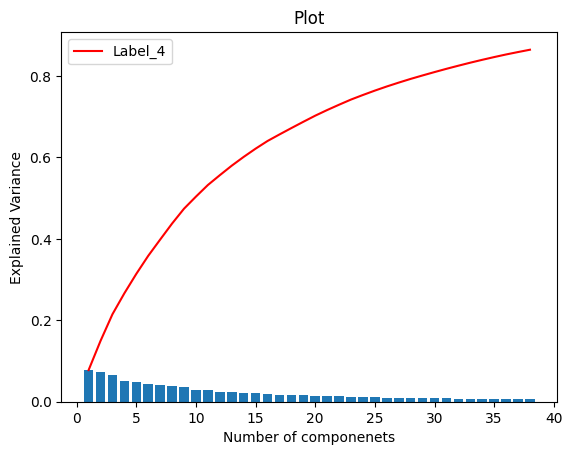

In [ ]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)

plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance),
         c='red', label='Label_4')

plt.legend(loc='upper left')
plt.xlabel('Number of componenets')
plt.ylabel('Explained Variance')
plt.title('Plot')

plt.show()

# Saving output to CSV files

In [ ]:
import os

import warnings
warnings.filterwarnings('ignore')


if not os.path.exists('output'):
    os.makedirs('output')

In [ ]:
def write_csv(feature, label):
  for i in range(feature['No of new features'][0], 256):
        feature[f'new_feature_{i+1}'] = pd.NA
  filename = f'output/190653L_label_{label}.csv'
  feature.to_csv(filename, index=False)

In [ ]:
write_csv(label_1_features.copy(), 1)
write_csv(label_2_features.copy(), 2)
write_csv(label_3_features.copy(), 3)
write_csv(label_4_features.copy(), 4)

# Final Output

In [ ]:
print (f"Features Count after apply feature engineering for Speaker ID: {label_1_features['No of new features'][0]}")
print (f"Features Count after apply feature engineering for Speaker Age: {label_2_features['No of new features'][0]}")
print (f"Features Count after apply feature engineering for Speaker Gender: {label_3_features['No of new features'][0]}")
print (f"Features Count after apply feature engineering for Speaker Accent: {label_4_features['No of new features'][0]}")

Features Count after apply feature engineering for Speaker ID: 48
Features Count after apply feature engineering for Speaker Age: 39
Features Count after apply feature engineering for Speaker Gender: 33
Features Count after apply feature engineering for Speaker Accent: 38
